## "Горбунов Даніел і в'язень embedding'у" 
## ... або процес виконання третьої лабораторної з предмету "Статистичні алгоритми навчання"

У рамках цієї роботи будемо працювати з відгуками користувачів на різні товари (книги, електроніка, музичний контент тощо). Датасет можна завантажити звідси: https://www.cs.jhu.edu/~mdredze/datasets/sentiment/. 

Перші кроки будуть присвячені підготовці даних до того вигляду з яким буде далі легше працювати. Зокрема серед 5 гігабайтів відшматованих, відмічених та несортованих відгуків про товари, вирішив працювати з текстами на користування електронними приладами.

Конкретно, оберу два файли з папок electronics, camera & photo архіву з усіма даними (unprocessed.tar.gz): positive.review та negative.review. Ці файли містять по 1000 позитивних та негативних відгуків відповідно. Всередині, як буде ще раз зазначено, дані подано в XML-форматі. Задля уникнення можливих конфліктів, спеціальні символи (на кшталт "&") перевів до переварюваного XML-парсером вигляду (наприклад "&amp;") та додав кореневий вузол для кожного з "дерев". 

In [1]:
import os
import xml.etree.ElementTree as ET

In [2]:
base_dir = os.getcwd()
base_dir

'/home/goodpenguin/PycharmProjects/pythonProject/univ/lab3'

In [3]:
data_dir = os.path.join(base_dir, 'data', 'electronics')
data_dir

'/home/goodpenguin/PycharmProjects/pythonProject/univ/lab3/data/electronics'

In [4]:
os.listdir(data_dir)

['texts.csv',
 '1. read data',
 'positive.review',
 'negative.review',
 'unlabeled.review',
 'іі']

Проклинав я те, що дані збережено в XML-подібному форматі. Втім, не проблема перевести це в інший вигляд, більш зручний для роботи (принаймні мені).

In [5]:
positive_reviews_path = os.path.join(data_dir, 'positive.review')
negative_reviews_path = os.path.join(data_dir, 'negative.review')

In [6]:
positive_tree = ET.parse(positive_reviews_path)

In [7]:
negative_tree = ET.parse(negative_reviews_path)

In [8]:
positive_tree_root = positive_tree.getroot()
negative_tree_root = negative_tree.getroot()

In [9]:
positive_reviews = positive_tree_root.findall('review')
len(positive_reviews)

2000

In [10]:
negative_reviews = negative_tree_root.findall('review')
len(negative_reviews)

2000

Нас цікавлять текстові дані, тому подивимося на перші з кожної підмножини.

In [11]:
current_positive = positive_reviews[0]
current_positive_text = current_positive.find('review_text').text
current_positive_text

"\n This is a great back pack! If there is anything I would change it would be the logo on the front. It's brite and shinny, and I'd rather not advertise that I have a camera in there! I colored it in with a felt pen and it works great....... Overall, I love the backpack!!  \n"

In [12]:
current_negative = negative_reviews[0]
current_negative_text = current_negative.find('review_text').text
current_negative_text

"\nthis backpack was very uncomfortable. the inserts are stiff. it doesn't represent canon quality (I hope)\n"

In [13]:
positive_texts = [
    current_review.find('review_text').text 
    for current_review in positive_reviews
]
n_pos = len(positive_texts)

In [14]:
negative_texts = [
    current_review.find('review_text').text 
    for current_review in negative_reviews
]
n_neg = len(negative_texts)

Тепер сформуємо таблицю з двох колонок: текст та його тональність (хороший чи поганий). Саму ж таблицю надалі збережемо в .csv форматі і збережемо там, де її можна знайти без лупи.

In [15]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [16]:
(n_pos, n_neg)

(2000, 2000)

In [17]:
df_texts = pd.DataFrame(
    data={
        "text": positive_texts + negative_texts,
        "rating": ([1] * n_pos) + ([0] * n_neg)
    }
)

In [18]:
df_texts_path = os.path.join(data_dir, "texts.csv")

In [19]:
df_texts.to_csv(path_or_buf=df_texts_path)

Тепер потрібно звести текстові дані до переварюваного моделями вигляду на основі embedding'у.

In [20]:
df_texts

,text,rating
0,"\n This is a great back pack! If there is anything I would change it would be the logo on the front. It's brite and shinny, and I'd rather not advertise that I have a camera in there! I colored it in with a felt pen and it works great....... Overall, I love the backpack!! \n",1
1,\nI love this backpack! It is just what I needed to safely carry my camera gear and keep it organized\n,1
2,"\nThis was the best item I ever bought for my camera. I do a lot of walking with my camera, and thought I would use it as a walking stick, which I do, but the best part of this monopod is what I never thought would happen. My pictures are NEVER fuzzy! I can take low light photos and have they come out clear. I paid very little for this item and would never be caught without it and my camera. The three levers on the bottom allow for quick expansion at all different lengths. The carrying case allows for this item to be packed next to my camera without it getting scratched\n",1
3,"\nPrice went up!!! Great value for money spent. Will be buying a ""Ball"" attachment for better adjustability. Got some great steady shots with 48x digital zoom with the Canon S2 I\n",1
4,"\nI've had this lens for 2 months now, and love it. It was my first ""L"" lens and I can see the quality difference in this line. First, I tried the 28-135 IS-pretty good. But I wasn't totally happy, so returned it and ordered the 24-105 L. Now I'm happy. Contrast, sharpness, & CA are much better. Build quality & feel are superior as well. Plus the IS really works. I will try & get all IS lens in the future, I believe it is worth the extra cost. Focusing is very quick and zoom action is smooth & steady. If you're on a budget, the 28-135 is real nice. But to go all the way, I recommend this lens. The IS on the 24-105 L is quieter I found. The price is a bit steep, but optical quality is there, resale value will remain good, and weather sealing should hopefully keep dust and junk from getting inside this lens.\n",1
...,...,...
3995,"\nJust a heads-up for people looking to use this scanner to scan slides. You will have to unmount the slides in order to be able to scan them. Given the verbiage on the box, it caught me as enough of a surprise that I returned the scanner. I'm not OK with deception like that\n",0
3996,\nThese blank discs are defective. I was never able to record any pictures or audio data to them.\n\nThe Maxell blank discs that I have did the job fine.\n,0
3997,"\nI ordered this item thinking that it would be useful when on the road in hotel rooms to light up my work area. WRONG !! The light is so DIM, the only thing it might be good for is a night light! This lamp is a good idea, but much too weak to be of any help\n",0
3998,"\nI was looking for a small cheap Mp3 player and I didn't care how much memory it had so this seemed perfect for me. I saw that many people had rated this 4 and 5 stars so I decided to buy it. When I got the Creative nano I was really happy with its preformance until I tried to put my subscription music onto it. Thats when I learned that it wouldn't hold any subscription music forcing me to buy my music one by one which is costing a lot of money.\n\nAfter that I started realising all of its imperfections. You can't use the FM radio in the car without hearing mostly static. You can't search through songs without actually changing the song you are listening to. Don't get me wrong, there are some good sides to this Mp3 player but I still would definately not recommend it\n",0


Зведемо кожен з текстів до масивів зі слів, порядок яких узгоджений з порядком у віпдовідному тексті. Спробуємо вилучити "невпливові" слова, позбудемося пунткації.

In [21]:
from nltk import download

for pkg in ['omw-1.4', 'punkt', 'stopwords', 'wordnet']:
    download(pkg)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/goodpenguin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/goodpenguin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/goodpenguin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/goodpenguin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
from string import punctuation

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer() 
stop_words = set(stopwords.words('english'))

In [23]:
def preprocess_text(tokenizer, lemmatizer, stop_words, punctuation, text): 
    tokens = tokenizer(text.lower())
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return [token for token in lemmas if token not in stop_words and token not in punctuation]

df_texts['cleaned'] = df_texts['text'].apply(
    lambda x: preprocess_text(word_tokenize, lemmatizer, stop_words, punctuation, x)
)

In [24]:
df_texts

,text,rating,cleaned
0,"\n This is a great back pack! If there is anything I would change it would be the logo on the front. It's brite and shinny, and I'd rather not advertise that I have a camera in there! I colored it in with a felt pen and it works great....... Overall, I love the backpack!! \n",1,"[great, back, pack, anything, would, change, would, logo, front, 's, brite, shinny, 'd, rather, advertise, camera, colored, felt, pen, work, great, ......., overall, love, backpack]"
1,\nI love this backpack! It is just what I needed to safely carry my camera gear and keep it organized\n,1,"[love, backpack, needed, safely, carry, camera, gear, keep, organized]"
2,"\nThis was the best item I ever bought for my camera. I do a lot of walking with my camera, and thought I would use it as a walking stick, which I do, but the best part of this monopod is what I never thought would happen. My pictures are NEVER fuzzy! I can take low light photos and have they come out clear. I paid very little for this item and would never be caught without it and my camera. The three levers on the bottom allow for quick expansion at all different lengths. The carrying case allows for this item to be packed next to my camera without it getting scratched\n",1,"[wa, best, item, ever, bought, camera, lot, walking, camera, thought, would, use, walking, stick, best, part, monopod, never, thought, would, happen, picture, never, fuzzy, take, low, light, photo, come, clear, paid, little, item, would, never, caught, without, camera, three, lever, bottom, allow, quick, expansion, different, length, carrying, case, allows, item, packed, next, camera, without, getting, scratched]"
3,"\nPrice went up!!! Great value for money spent. Will be buying a ""Ball"" attachment for better adjustability. Got some great steady shots with 48x digital zoom with the Canon S2 I\n",1,"[price, went, great, value, money, spent, buying, ``, ball, '', attachment, better, adjustability, got, great, steady, shot, 48x, digital, zoom, canon, s2]"
4,"\nI've had this lens for 2 months now, and love it. It was my first ""L"" lens and I can see the quality difference in this line. First, I tried the 28-135 IS-pretty good. But I wasn't totally happy, so returned it and ordered the 24-105 L. Now I'm happy. Contrast, sharpness, & CA are much better. Build quality & feel are superior as well. Plus the IS really works. I will try & get all IS lens in the future, I believe it is worth the extra cost. Focusing is very quick and zoom action is smooth & steady. If you're on a budget, the 28-135 is real nice. But to go all the way, I recommend this lens. The IS on the 24-105 L is quieter I found. The price is a bit steep, but optical quality is there, resale value will remain good, and weather sealing should hopefully keep dust and junk from getting inside this lens.\n",1,"['ve, lens, 2, month, love, wa, first, ``, l, '', lens, see, quality, difference, line, first, tried, 28-135, is-pretty, good, wa, n't, totally, happy, returned, ordered, 24-105, l., 'm, happy, contrast, sharpness, ca, much, better, build, quality, feel, superior, well, plus, really, work, try, get, lens, future, believe, worth, extra, cost, focusing, quick, zoom, action, smooth, steady, 're, budget, 28-135, real, nice, go, way, recommend, lens, 24-105, l, quieter, found, price, bit, steep, optical, quality, resale, value, remain, good, weather, sealing, hopefully, keep, dust, junk, getting, inside, lens]"
...,...,...,...
3995,"\nJust a heads-up for people looking to use this scanner to scan slides. You will have to unmount the slides in order to be able to scan them. Given the verbiage on the box, it caught me as enough of a surprise that I returned the scanner. I'm not OK with deception like that\n",0,"[heads-up, people, looking, use, scanner, scan, slide, unmount, slide, order, able, scan, given, verbiage, box, caught, enough, surprise, returned, scanner, 'm, ok, deception, like]"
3996,\nThese blank discs are defective. I was never

До речі, час зробити тренувальну та тестову вибірки. Проведемо стратифікований відбір, тобто кількість об'єктів не залежатиме від вибору класу (чи то хороший кометар, чи ні).

In [25]:
import numpy as np
np.random.seed(0)

n = n_pos
n_test = n // 10
n_test

200

In [26]:
idx_test_pos = np.random.choice(
    np.arange(0, n_pos), size=(n_test // 2), replace=False
)
idx_test_neg = np.random.choice(
    n_pos + np.arange(0, n_neg), size=(n_test // 2), replace=False
)

In [27]:
df_texts.iloc[idx_test_pos][['cleaned', 'rating']]

,cleaned,rating
405,"[canoe/kayak, various, river, creek, wanted, way, take, 1500, camera, water, without, fear, damaging, sport, pack, completely, water, proof, 7m, 've, submersed, case, test, real-life, situation, camera, stayed, dry, case, doe, cause, noticeable, reduction, picture, quality, relatively, simple, operate, assemble, basic, function, camera, case, need, change, setting, camera, putting, case, advanced, camera, feature, able, used, concern, scratch, resistance, plastic, lens, area, far, n't, problem, 've, taken, river, 30, hr, told, 'm, pleased, plan, filming, near, water, would, recommend, case]",1
1190,"['m, using, monster, cable, connect, ipod, receiver, via, ipod, dock, work, flawlessly, sound, crisp, clear, plus, 's, lot, cheaper, getting, actual, monster, ipod, av, cable, length, cable, make, convenient, cumbersome, 's, great, way, increase, functionality, ipod]",1
1132,"[wanted, non-ipod, digital, music, player, found, terrific, option, play, number, different, format, includes, lanyard, nice, commuting, train, plane, travel, used, alkaline, battery, far, excellent, battery, life, menu, take, hour, 2, playing, learn, get, familiar, button, menu, 's, pretty, easy, also, enjoyed, built, fm, tuner, trouble, reception, even, moving, commuter, train, sound, quality, good, 've, using, 128, bitrate, mp3, song, far, software, transferring, music, pretty, easy, use, although, little, trouble, getting, player, recognized, connected, seemed, kind, order, connection, issue, included, earbuds, n't, comfortable, especially, since, already, lost, foam, padding, probably, get, better, pair, anyway, sound, good, though, also, included, case, pretty, ...]",1
731,"[white, one, black, wa, unavailable, time, purchase, 1., camera, slide, even, though, clasp, magnet, made, snug, enough, felt, hold, case, even, shake, jostle, 2., durable, scrape, scratch, 7, month, 3., n't, missed, belt, clip, option, small, enough, fit, pocket, 4., well, constructed/durable, people, think, sort, ipod, case/holder]",1
1754,"[wall, mount, work, hold, 's, great, used, olevia, 542i, lcd, flat, panel, problem, instruction, clear, hard, figure, instal]",1
...,...,...
1999,"[mouse, ha, never, let, really, work, surface]",1
1927,"[map, good, enough, navigation, street, outdoor, adventure, allows, downloading, track, waypoints, gps, editing, saving, file, gps, annoying, put, last, cd, drive, use, program]",1
80,"[great, camera, take, place, earlier, canon, digital, elph, lost, several, year, ago, 7.1, megapixels, ensures, great, quality, 3x, zoom, provides, crisp, clear, picture, fact, digital, zoom, also, work, great, make, sure, camera, steady, purchased, nice, compact, monopod, result, awesome, although, image, stabilization, feature, newer, model, would, great, ca, n't, beat, price, overall, quality, camera, picture, take, canon, sd500, great, little, camera]",1
1854,"[elegant, design, sturdy, construction, support, yamaha, sy35, securely, reading, forbidding, review, decided, assemble, without, first, reading, direction, took, 10, min]",1


In [28]:
df_texts.iloc[idx_test_neg][['cleaned', 'rating']]

,cleaned,rating
3162,"[sound, wa, great, dvd, would, lag, every, 10-15, second, movie, drove, nut, return]",0
2142,"[bag, small, canon, 20d, fit, nicely, small, lens, fit, one, lens, camera, body, kept, bag, informal, use, need, body, one, lens, avoid, always, carry, bulky, bag]",0
3848,"[agree, poster, complained, driver, available, download, day, age, excuse, company, making, thing, available, customer, voice, recorder, tool, go, carry, cd, u, well, case, want, plug, recorder, different, machine, case, wanton, disrespect, customer, big, company]",0
3189,"[drive, fail, one, year, half, ..., company, really, suck, big, time, ...., lost, data, ..., ..., third, one, fail, four, purchased, last, year, total, junk, ..., never, buy, lacie, sure, ...., maxtor, external, best]",0
3561,"[piece, junk, radio, reception, terrible, fm, marginal, almost, nonexistent]",0
...,...,...
2499,"[paid, 99.00, little, camcorder, thought, would, ideal, action, sport, hero, house, could, n't, get, video, transfer, pc, menu, button, would, bring, anything, overall, could, n't, get, thing, work, bummer, christmas, present]",0
3044,"[problem, burning, disc, went, back, month, later, disc, found, none, work, anymore, research, found, memorex, us, cheapest, dye, available, thus, dvd, absolutelly, life, disc, started, dying, month, addition, physically, hold, disc, hand, feel, warped, physically, ha, become, true, disc, 150, recommend, product, stronly, enough]",0
3750,"[work, palm, t|c, right, away, 've, used, purpose, expect, either, palm, sd, release, proper, software, work, palm, t|c]",0
3672,"[battery, pack, walkie, talkie, last, hour, only-, disappointed, quality, need, emergency, throughout, day-, farmed, animal, sanctuary-, non-profit, afford, purchase, new, battery, paying, already, willing, change, review, get, new, battery, came, time-, good, quality-, batterie]",0


In [29]:
# Для відтворення результатів
np.random.seed(12345)

idx_test = np.append(idx_test_pos, idx_test_neg)
np.random.shuffle(idx_test)
# idx_test

In [30]:
df_train = df_texts.drop(index=idx_test, axis=0).sample(frac=1)
df_test = df_texts.iloc[idx_test]

In [31]:
df_train[['cleaned', 'rating']].head()

,cleaned,rating
3720,"[software, terrible, slow, glitchy, start, close, multiple, time, get, find, player, operator, manual, 100, page, fun, learning, intricacy, control, granted, hardware, cute, variety, function, impressive, --, assuming, sufficient, spare, time, study, manual]",0
3310,"[1gb, titanium, sandisk, cruzer, work, fail, tried, several, time, contact, sandisk, including, selling, vendor, absolutely, response, wife, 's, cruzer, failed, well, power, light, come, recognized, xp, light, go, system, ca, n't, id, device, 's, useless, doe, thing, xp, system, house, 've, tried, front, side, usb, connection, rear, connection, hub, connection, dice, 'll, never, buy, another, sandisk, cruzer, wa, going, order, another, 100, office, loss]",0
3219,"[ordered, product, june, 21st, told, receive, oct, 28th, would, n't, waste, time, ordering, product, amazon]",0
528,"[bought, battery, charger, going, overseas, trip, n't, want, bothered, frequently, changing, aa, battery, seemed, last, day, heavy, use, wa, quite, pleased, performance, rechargeables, lasted, several, day, heavy, use, needing, charged, re-charged, hour, big, bonus, n't, expect, recharger, compatible, european, 240, voltage, n't, use, electric, converter]",1
3809,"[terrible, user, interface, must, page, ton, cryptic, menu, set, basic, feature, pull, multiple, paper, must, start, g3, would, think, would, compatible, earlier, non-g3, fax, machine, wrong, ca, n't, fax, 75, community, ha, non, g3, unit, thought, wa, buying, quality, canon, paid, 250, hunk, junk, cheap, brother, hp, 's, work, never, problem, easier, use, much, le, expensive, save, money, save, headache, sorry, canon, product, wa, disaster]",0


In [32]:
df_train.shape

(3800, 3)

In [33]:
df_test[['cleaned', 'rating']].head()

,cleaned,rating
76,"[original, equipment, battery, charger, manufactered, canon, performance, charger, excellent, canon, product, price, paid, wa, comparible, non-sale, priced, item, puchased, via, internet, site, item, wa, recieved, original, packaging, 3, day, placing, order, wa, new, reconditioned, new, appearance, extremely, pleased, entire, purchase, process, experienced, information, given, site, ease, ordering, fast, shipping]",1
3273,"[using, radio, two, month, say, battery, life, poor.a, full, charge, doe, n't, hold, three, hours.perhaps, battery, n't, come, good, condition, n't, use, aaa, yet, ..., 10, mile, range, true, normal, environment, open, sea, desert, perhaps.product, work, fine, battery, la]",0
2460,"[bought, year, ago, ha, lens, cap, error, appears, like, shutter, never, open, record, video, spoke, jvc, seemed, know, problem, send, update, rating, see, wrong, fix, stand, behind, product, watch, detail, failed, complaint, wa, wa, little, flakey, lighting, otherwise, worked, okay, price]",0
3935,"[bought, c., crane, fm, transmitter, expecting, broadcast, computer, listen, fm, tuner, headset, worked, around, house, yard, broadcast, 5, 6, foot, max, box, performed, power, boosting, ``, fix, '', broadcast, 10-20, foot, 'm, lucky, static, overpowers, signal, wa, disappointing, purchase, directly, c., crane, way, met, expectation, requires, setting, transmitter, grounded, metal, plate, lengthening, antenna, order, bring, transmission, whole, house, yard, capability, build, way, get-go, state, limitation, transmitter, forthrightly, kept, transmitter, wanted, one, car, 's, physically, well, built, work, fine, also, use, play, ipod, radio, ..., understand, radio, sitting, right, next, transmitter, want, transmit, throughout, house, yard, look, elsewhere]",0
475,"[carrying, case, made, either, fake, leather, kind, neoprene, material, one, really, different, rigid, structure, also, seem, great, job, protect, camera, also, belt, loop, d-ring, feature, great]",1


In [34]:
df_test.shape

(200, 3)

Створення словника на основі трансформацій:

In [35]:
def flat_nested(nested):
    flatten = []
    for item in nested:
        if isinstance(item, list):
            flatten.extend(item)
        else:
            flatten.append(item)
    return flatten

Чому словник на основі тренувальної вибірки? Бо наперед ми не знаємо що ж то за відгуки ще будуть з "розподілу" відгуків про електроніку.

In [36]:
vocab = set(flat_nested(df_train['cleaned'].tolist()))

In [37]:
len(vocab)

15958

А шо в тому словнику то коїться? Давайте подивимося на найбільш розповсюджені вирази.

In [38]:
from collections import Counter, defaultdict 

cnt_vocab = Counter(flat_nested(df_train['cleaned'].tolist()))

In [39]:
cnt_vocab.most_common(20)

[('camera', 3668),
 ('wa', 3022),
 ("n't", 2654),
 ("'s", 2128),
 ('one', 1877),
 ('use', 1469),
 ('would', 1459),
 ('picture', 1412),
 ('lens', 1329),
 ('good', 1325),
 ('get', 1250),
 ('great', 1250),
 ('ha', 1207),
 ('work', 1194),
 ('time', 1182),
 ("''", 1121),
 ('battery', 1087),
 ('like', 1040),
 ('product', 1016),
 ('quality', 1012)]

Загалом трапляються на очі нормальні слова, але видно що в словнику є частки до займенників, лапки від назв та інше, які не були оброблені текстовим процесором.

In [40]:
cnt_vocab.most_common()[-50:-1]

[('weakly', 1),
 ('selectivity', 1),
 ('broadcaster', 1),
 ('enormously', 1),
 ('defying', 1),
 ('consigned', 1),
 ('province', 1),
 ('ascertaining', 1),
 ('dalai', 1),
 ('lama', 1),
 ('5,000', 1),
 ('150,000', 1),
 ('conventiona', 1),
 ('australian', 1),
 ('havana', 1),
 ('serbia', 1),
 ('croatia', 1),
 ('netherlands', 1),
 ('israel', 1),
 ('seaboard', 1),
 ('easy-to-read', 1),
 ('knowlege', 1),
 ('equipped', 1),
 ('investigator', 1),
 ('ir-sensitive', 1),
 ('cheeseygreen', 1),
 ('time/date', 1),
 ('xfer', 1),
 ('sleepmode', 1),
 ('alloy', 1),
 ('close-proximity', 1),
 ('print/siloutte', 1),
 ('97.00', 1),
 ('impacted', 1),
 ('100.00/yr', 1),
 ('maintaining', 1),
 ('hallmark', 1),
 ('6db', 1),
 ('2db', 1),
 ('cd543rm', 1),
 ('543', 1),
 ('543.', 1),
 ('clicky', 1),
 ('ihome', 1),
 ('caselogic', 1),
 ('discontinuing', 1),
 ('lowdown', 1),
 ('16x20', 1),
 ('chorus', 1)]

Серед найменш застосовних слів використовуються наче нормальні слова, більша частка яких може бути синонімами більш розповсюджених слів. Поки побудуємо словник без слів-часток та подібного.

In [41]:
threshold_count = 1
threshold_len = 2
cleaned_vocab = list()
for token, count in cnt_vocab.items():
    if count > threshold_count and len(token) > threshold_len:
        cond_digit = not any(c.isdigit() for c in token)
        cond_punct = token[0] not in punctuation
        
        if cond_digit and cond_punct:
            cleaned_vocab.append(token)

In [42]:
len(cleaned_vocab)

7042

In [43]:
# Фільтрування на основі нового словника
def sequence_cleaner(s, voc):
    res = [sj for sj in s if sj in voc]
    return res

df_train['filtered'] = df_train['cleaned'].apply(lambda u: sequence_cleaner(u, cleaned_vocab))
df_test['filtered'] = df_test['cleaned'].apply(lambda u: sequence_cleaner(u, cleaned_vocab))

/tmp/ipykernel_3747/3297121535.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['filtered'] = df_test['cleaned'].apply(lambda u: sequence_cleaner(u, cleaned_vocab))


In [44]:
df_train[['cleaned', 'filtered', 'rating']].head()

,cleaned,filtered,rating
3720,"[software, terrible, slow, glitchy, start, close, multiple, time, get, find, player, operator, manual, 100, page, fun, learning, intricacy, control, granted, hardware, cute, variety, function, impressive, --, assuming, sufficient, spare, time, study, manual]","[software, terrible, slow, glitchy, start, close, multiple, time, get, find, player, operator, manual, page, fun, learning, control, granted, hardware, cute, variety, function, impressive, assuming, sufficient, spare, time, study, manual]",0
3310,"[1gb, titanium, sandisk, cruzer, work, fail, tried, several, time, contact, sandisk, including, selling, vendor, absolutely, response, wife, 's, cruzer, failed, well, power, light, come, recognized, xp, light, go, system, ca, n't, id, device, 's, useless, doe, thing, xp, system, house, 've, tried, front, side, usb, connection, rear, connection, hub, connection, dice, 'll, never, buy, another, sandisk, cruzer, wa, going, order, another, 100, office, loss]","[titanium, sandisk, cruzer, work, fail, tried, several, time, contact, sandisk, including, selling, vendor, absolutely, response, wife, cruzer, failed, well, power, light, come, recognized, light, system, n't, device, useless, doe, thing, system, house, tried, front, side, usb, connection, rear, connection, hub, connection, dice, never, buy, another, sandisk, cruzer, going, order, another, office, loss]",0
3219,"[ordered, product, june, 21st, told, receive, oct, 28th, would, n't, waste, time, ordering, product, amazon]","[ordered, product, june, told, receive, oct, would, n't, waste, time, ordering, product, amazon]",0
528,"[bought, battery, charger, going, overseas, trip, n't, want, bothered, frequently, changing, aa, battery, seemed, last, day, heavy, use, wa, quite, pleased, performance, rechargeables, lasted, several, day, heavy, use, needing, charged, re-charged, hour, big, bonus, n't, expect, recharger, compatible, european, 240, voltage, n't, use, electric, converter]","[bought, battery, charger, going, overseas, trip, n't, want, bothered, frequently, changing, battery, seemed, last, day, heavy, use, quite, pleased, performance, rechargeables, lasted, several, day, heavy, use, needing, charged, re-charged, hour, big, bonus, n't, expect, recharger, compatible, european, voltage, n't, use, electric, converter]",1
3809,"[terrible, user, interface, must, page, ton, cryptic, menu, set, basic, feature, pull, multiple, paper, must, start, g3, would, think, would, compatible, earlier, non-g3, fax, machine, wrong, ca, n't, fax, 75, community, ha, non, g3, unit, thought, wa, buying, quality, canon, paid, 250, hunk, junk, cheap, brother, hp, 's, work, never, problem, easier, use, much, le, expensive, save, money, save, headache, sorry, canon, product, wa, disaster]","[terrible, user, interface, must, page, ton, menu, set, basic, feature, pull, multiple, paper, must, start, would, think, would, compatible, earlier, fax, machine, wrong, n't, fax, non, unit, thought, buying, quality, canon, paid, hunk, junk, cheap, brother, work, never, problem, easier, use, much, expensive, save, money, save, headache, sorry, canon, product, disaster]",0


In [45]:
df_test[['cleaned', 'filtered', 'rating']].head()

,cleaned,filtered,rating
76,"[original, equipment, battery, charger, manufactered, canon, performance, charger, excellent, canon, product, price, paid, wa, comparible, non-sale, priced, item, puchased, via, internet, site, item, wa, recieved, original, packaging, 3, day, placing, order, wa, new, reconditioned, new, appearance, extremely, pleased, entire, purchase, process, experienced, information, given, site, ease, ordering, fast, shipping]","[original, equipment, battery, charger, canon, performance, charger, excellent, canon, product, price, paid, priced, item, puchased, via, internet, site, item, recieved, original, packaging, day, placing, order, new, reconditioned, new, appearance, extremely, pleased, entire, purchase, process, experienced, information, given, site, ease, ordering, fast, shipping]",1
3273,"[using, radio, two, month, say, battery, life, poor.a, full, charge, doe, n't, hold, three, hours.perhaps, battery, n't, come, good, condition, n't, use, aaa, yet, ..., 10, mile, range, true, normal, environment, open, sea, desert, perhaps.product, work, fine, battery, la]","[using, radio, two, month, say, battery, life, full, charge, doe, n't, hold, three, battery, n't, come, good, condition, n't, use, aaa, yet, mile, range, true, normal, environment, open, sea, work, fine, battery]",0
2460,"[bought, year, ago, ha, lens, cap, error, appears, like, shutter, never, open, record, video, spoke, jvc, seemed, know, problem, send, update, rating, see, wrong, fix, stand, behind, product, watch, detail, failed, complaint, wa, wa, little, flakey, lighting, otherwise, worked, okay, price]","[bought, year, ago, lens, cap, error, appears, like, shutter, never, open, record, video, spoke, jvc, seemed, know, problem, send, update, rating, see, wrong, fix, stand, behind, product, watch, detail, failed, complaint, little, lighting, otherwise, worked, okay, price]",0
3935,"[bought, c., crane, fm, transmitter, expecting, broadcast, computer, listen, fm, tuner, headset, worked, around, house, yard, broadcast, 5, 6, foot, max, box, performed, power, boosting, ``, fix, '', broadcast, 10-20, foot, 'm, lucky, static, overpowers, signal, wa, disappointing, purchase, directly, c., crane, way, met, expectation, requires, setting, transmitter, grounded, metal, plate, lengthening, antenna, order, bring, transmission, whole, house, yard, capability, build, way, get-go, state, limitation, transmitter, forthrightly, kept, transmitter, wanted, one, car, 's, physically, well, built, work, fine, also, use, play, ipod, radio, ..., understand, radio, sitting, right, next, transmitter, want, transmit, throughout, house, yard, look, elsewhere]","[bought, transmitter, expecting, broadcast, computer, listen, tuner, headset, worked, around, house, yard, broadcast, foot, max, box, performed, power, fix, broadcast, foot, lucky, static, signal, disappointing, purchase, directly, way, met, expectation, requires, setting, transmitter, metal, plate, antenna, order, bring, whole, house, yard, capability, build, way, state, limitation, transmitter, kept, transmitter, wanted, one, car, physically, well, built, work, fine, also, use, play, ipod, radio, understand, radio, sitting, right, next, transmitter, want, transmit, throughout, house, yard, look, elsewhere]",0
475,"[carrying, case, made, either, fake, leather, kind, neoprene, material, one, really, different, rigid, structure, also, seem, great, job, protect, camera, also, belt, loop, d-ring, feature, great]","[carrying, case, made, either, fake, leather, kind, neoprene, material, one, really, different, rigid, also, seem, great, job, protect, camera, also, belt, loop, feature, great]",1


Як то кажуть, ''much better''. Хоча наврядчи вибування деяких часток типу was, does, ... було розумною ідеєю. Маю на увазі, що запропонований підхід до перетворення речення на токени є дещо грубим, бо ріже зв'язки, які частково базуються на тих самих частках.

Тепер будую рекурентну нейронну мережу з власним шаром вкладення слів.

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Для відтворення результатів
torch.manual_seed(12345)

In [47]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [48]:
# Аби не плутатися в позначеннях
VOCAB = cleaned_vocab.copy()
VOCAB.append(' ')

WORD_TO_IDX = {WORD: IDX for IDX, WORD in enumerate(VOCAB)}

def vectorize(s, word_map):
    sequence_lengths = list(map(len, s))
    max_length = max(sequence_lengths)
    
    s_idx = np.zeros([len(s), max_length]) + word_map.get('', 0)

    for j in range(len(s)):
        line_idx = [word_map[w] for w in s[j] if w in word_map]
        s_idx[j, :len(line_idx)] = line_idx

    return s_idx, sequence_lengths

In [49]:
class BaseRNN(nn.Module):
    
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super(self.__class__, self).__init__()
        # Тренуємо власний шар вкладення слів
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        # Інші компоненти RNN
        self.rnn = nn.RNN(embedding_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, 1)      
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, sequences_lengths):
        # Вкладаємо текст (-ову послідовність) 
        embedding = self.embedding(x)
        pack = torch.nn.utils.rnn.pack_padded_sequence(
            embedding, sequences_lengths, 
            batch_first=True, enforce_sorted=False
        )
        # Долучаємо рекурентну компоненту
        all_hidden_states, hidden = self.rnn(pack)
        # Витягуємо з RNN-компоненти дані у класичний шар мережі
        from_linear = self.linear(hidden)
        # Прогнозуємо тональність текстів
        output = self.sigmoid(from_linear)
        return output

In [50]:
# Ініціалізація моделі
model = BaseRNN(
    vocab_size=len(VOCAB), embedding_size=500, hidden_size=200
)
model.to(device)

BaseRNN(
  (embedding): Embedding(7043, 500)
  (rnn): RNN(500, 200, batch_first=True)
  (linear): Linear(in_features=200, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [51]:
epoch_loss_values = []
step_loss_values = []

In [52]:
# Функція вартості -- "бінарна ентропія" 
loss_function = nn.BCELoss()
# Використаємо ADAM в якості оптимізатора
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [53]:
batch_size = 50 # => 3800 / 50 = 76 міні-пакетів
n_epochs = 20
n_train = df_train.shape[0]
n_iters = n_train // batch_size
print("Кількість ітерацій за одну епоху: {}".format(n_iters))

n_tab = str(len(str(n_epochs)))

# Аби не ускладнювати код, припустимо, що n_train ділиться на n_iters * batch_size

for epoch in range(n_epochs):
    epoch_loss = 0 
    
    df_train_c = df_train.copy().sample(n_train).reset_index(drop=True)
    
    for step in range(n_iters):

        optimizer.zero_grad()
        # Випадковий міні-пакет
        #current_batch = df_train.sample(batch_size)
        # Детермінований міні-пакет
        idx = np.arange(0, batch_size, 1) + batch_size * step
        current_batch = df_train_c.iloc[idx]

        # Векторизація поточного міні-пакета
        batch_idx, seq_lengths = vectorize(current_batch['filtered'].tolist(), WORD_TO_IDX)
        seq_lengths = np.array(seq_lengths)
        # Перетворення векторизованого міні-пакета у тензор
        batch_idx = torch.tensor(batch_idx, dtype=torch.int64).to(device)

        # Обираємо справжні рейтинги та переводимо у тензор
        y_true = current_batch['rating'].tolist() 
        y_true = torch.tensor(y_true, dtype=torch.float).to(device)

        # Прогнозування
        y_pred = model(batch_idx, seq_lengths)

        loss = loss_function(y_pred.squeeze(), y_true)
        
        step_loss_values.append(loss)

        epoch_loss += loss.item() / n_iters
        loss.backward()
        optimizer.step()
    
    epoch_loss_values.append(epoch_loss)
            
    print(('Епоха {:' + n_tab + '}: сумарні втрати: {}').format(epoch+1, epoch_loss))    

Кількість ітерацій за одну епоху: 76
Епоха  1: сумарні втрати: 0.6137966846949177
Епоха  2: сумарні втрати: 0.4399265233231217
Епоха  3: сумарні втрати: 0.28222264927860935
Епоха  4: сумарні втрати: 0.17020917419148116
Епоха  5: сумарні втрати: 0.0940285447837883
Епоха  6: сумарні втрати: 0.0882777004674273
Епоха  7: сумарні втрати: 0.09895339843473937
Епоха  8: сумарні втрати: 0.048322547429339266
Епоха  9: сумарні втрати: 0.026284195225391733
Епоха 10: сумарні втрати: 0.015118752863552227
Епоха 11: сумарні втрати: 0.025661350404047163
Епоха 12: сумарні втрати: 0.01319908095970995
Епоха 13: сумарні втрати: 0.0046874285395269435
Епоха 14: сумарні втрати: 0.0020829193212863945
Епоха 15: сумарні втрати: 0.0015524970918991848
Епоха 16: сумарні втрати: 0.0013848867303367068
Епоха 17: сумарні втрати: 0.0012354692599298065
Епоха 18: сумарні втрати: 0.0011649362237030319
Епоха 19: сумарні втрати: 0.0010869406438647087
Епоха 20: сумарні втрати: 0.001045372933348469


In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

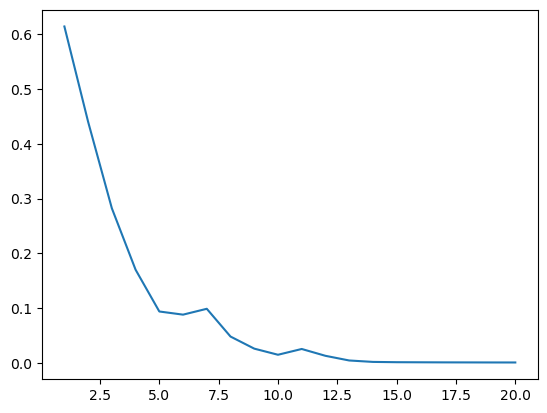

In [55]:
plt.plot(np.arange(1, n_epochs + 1), epoch_loss_values)
plt.show()

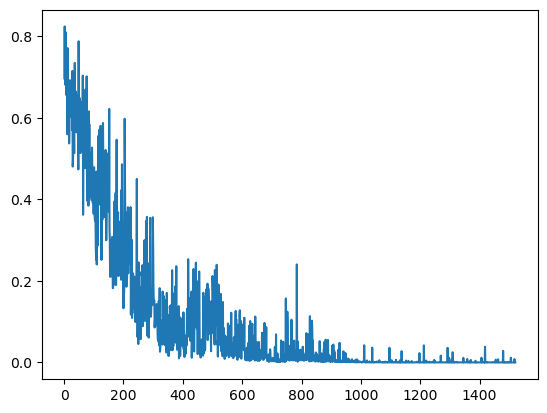

In [56]:
plt.plot(
    np.arange(1, n_iters * n_epochs + 1), 
    [v.cpu().detach().numpy() for v in step_loss_values]
)
plt.show()

In [57]:
# Декілька функцій для прогнозування на тестових даних

def index_marks(nrows, chunk_size):
    return range(1 * chunk_size, (nrows // chunk_size + 1) * chunk_size, chunk_size)

def split(df, chunk_size):
    indices = index_marks(df.shape[0], chunk_size)
    s = np.split(df, indices)
    if s[-1].empty:
        return s[:-1]
    return s

In [58]:
def make_predictions(model, df_test, batch_size, threshold, prints_b = True): 
    n_prints = 0
    predictions = []
    true_labels = []
    # Розбиття даних на міні-пакети
    test_batches = split(df_test, batch_size)
    
    for batch in test_batches:
        # Векторизація міні-пакетів
        batch_ix, seq_lengths = vectorize(batch['filtered'].tolist(), WORD_TO_IDX)
        seq_lengths = np.array(seq_lengths)
        # Перетворення міні-пакетів у тензор 
        batch_ix = torch.tensor(batch_ix, dtype=torch.int64).to(device)

        # Обираємо справжні рейтинги
        y_true = batch['rating'].tolist()

        # Прогнозування
        y_pred = model(batch_ix, seq_lengths).cpu().detach().squeeze().numpy()
        # Переводимо "ймовірності" у прогнози рейтингів
        y_pred = [int(pred.item() > threshold) for pred in y_pred]
        
        # Додаємо до векторів справжніх значень та прогнозів відповідно
        predictions.extend(y_pred)
        true_labels.extend(y_true)
        
        # Щось час від часу виводимо: як вдалий, так і невдалий прогноз 
        if prints_b:
            for true, pred, document in zip(y_true, y_pred, batch['text']):
                if true == 1.0 and n_prints < 10:
                    print("Прогноз: {}".format(pred))
                    print("Істина: {}".format(true))
                    print("Відгук: {}".format(document))
                    print("\n" + "\=\="*20 + "\n")
                    n_prints += 1
        
    return true_labels, predictions

In [59]:
true_labels, predictions = make_predictions(model, df_test, batch_size=batch_size, threshold=0.5)

Прогноз: 1
Істина: 1
Відгук: 
This is original equipment battery charger manufactered by Canon. The performance of the charger is excellent as are most Canon products. The price paid was comparible to non-sale priced items puchased via internet sites. The item was recieved in original packaging, 3 days after placing the order, was new (not reconditioned with a new appearance). I am extremely pleased with the entire purchase process experienced, from the information given at the site to ease of ordering and fast shipping


\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=

Прогноз: 1
Істина: 1
Відгук: 
With most of the carrying case made of either fake leather or some kind of neoprene material, this one is really different.  The rigid structure also seem to do a great job to protect the camera.  There is also a belt loop and D-ring feature which is great.



\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=

Прогноз: 0
Істина

In [60]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Матриця якості класифікації на тестових даних:

In [61]:
print(classification_report(true_labels, predictions))
print(accuracy_score(true_labels, predictions))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       100
           1       0.82      0.71      0.76       100

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200

0.775


In [62]:
true_labels, predictions = make_predictions(model, df_train, batch_size=batch_size, threshold=0.5)

Прогноз: 1
Істина: 1
Відгук: 
Bought these batteries & charger just before going on an overseas trip.  I didn't want to be bothered with frequently changing AA batteries, which seemed to last only a day or so of heavy use.  I was quite pleased with the performance of these rechargeables.  They lasted several days of heavy use before needing to be charged and they re-charged in only a few hours.  A big bonus that I didn't expect:  the recharger is compatible with European 240 voltage so I didn't have to use an electric converter! 


\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=

Прогноз: 1
Істина: 1
Відгук: 
This is our first LCD TV.  Our tube TV finally died.  My wife actually picked out this unit and Consumer Reports also recommended this unit.  We purchased it directly from AMAZON on January 23, 2007.  I wanted to wait a couple of months before I write my review to see if anything happens. But to my surprise the TV is still running and there have be

Матриця якості класифікації на тренувальних даних:

In [63]:
print(classification_report(true_labels, predictions))
print(accuracy_score(true_labels, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1900
           1       1.00      1.00      1.00      1900

    accuracy                           1.00      3800
   macro avg       1.00      1.00      1.00      3800
weighted avg       1.00      1.00      1.00      3800

0.9997368421052631


Паршиво. Зауважимо, що в нас довгасті такі собі послідовності, тому, можливо, варто додати у модель компоненту довготривалої пам'яті. Наприклад, LSTM-компоненту.

In [64]:
class BaseLSTM(nn.Module):
    
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super(self.__class__, self).__init__()
        # Тренуємо власний шар вкладення слів
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        # Інші компоненти LSTM
        self.lstm = nn.LSTM(input_size=embedding_size, 
                            hidden_size=hidden_size, 
                            num_layers=1, 
                            batch_first=True,
                            bidirectional=True)
        self.linear = nn.Linear(2 * hidden_size, 1)      
        self.sigmoid = nn.Sigmoid()
        
        self.hidden_size = hidden_size
        
    def forward(self, x, sequences_lengths):
        # Вкладаємо текст (-ову послідовність) 
        embedding = self.embedding(x)

        pack = torch.nn.utils.rnn.pack_padded_sequence(
            embedding, sequences_lengths, 
            batch_first=True, enforce_sorted=False
        )
        # Долучаємо рекурентну компоненту        
        packed_out, _ = self.lstm(pack)
        out, _ = torch.nn.utils.rnn.pad_packed_sequence(
            packed_out, batch_first=True
        )
        out_fwd = out[range(len(out)), sequences_lengths - 1, :self.hidden_size]
        out_rev = out[:, 0, self.hidden_size:]
        out_red = torch.cat((out_fwd, out_rev), 1)
        # Витягуємо з LSTM-компоненти дані у класичний шар мережі
        from_linear = self.linear(out_red)
        # Прогнозуємо тональність текстів
        output = self.sigmoid(from_linear)
        return output

In [65]:
# Ініціалізація моделі
model = BaseLSTM(
    vocab_size=len(VOCAB), embedding_size=250, hidden_size=100
)
model.to(device)

BaseLSTM(
  (embedding): Embedding(7043, 250)
  (lstm): LSTM(250, 100, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=200, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [66]:
epoch_loss_values = []
step_loss_values = []

In [67]:
# Функція вартості -- "бінарна ентропія" 
loss_function = nn.BCELoss()
# Використаємо ADAM в якості оптимізатора
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [68]:
batch_size = 50 # => 3800 / 50 = 76 міні-пакетів
n_epochs = 50
n_train = df_train.shape[0]
n_iters = n_train // batch_size
print("Кількість ітерацій за одну епоху: {}".format(n_iters))

n_tab = str(len(str(n_epochs)))

# Аби не ускладнювати код, припустимо, що n_train ділиться на n_iters * batch_size

for epoch in range(n_epochs):
    epoch_loss = 0 
    
    df_train_c = df_train.copy().sample(n_train).reset_index(drop=True)
    
    for step in range(n_iters):

        optimizer.zero_grad()
        # Випадкових пакет
        #current_batch = df_train.sample(batch_size)
        # Детермінований пакет
        idx = np.arange(0, batch_size, 1) + batch_size * step
        current_batch = df_train_c.iloc[idx]

        # Векторизація поточного пакета
        batch_idx, seq_lengths = vectorize(current_batch['filtered'].tolist(), WORD_TO_IDX)
        seq_lengths = np.array(seq_lengths)
        # Переводимо міні-пакет у тензор
        batch_idx = torch.tensor(batch_idx, dtype=torch.int64).to(device)
        
        # Обираємо справжні рейтинги та переводимо у тензор
        y_true = current_batch['rating'].tolist() 
        y_true = torch.tensor(y_true, dtype=torch.float).to(device)

        # Прогноз
        y_pred = model(batch_idx, seq_lengths)
        
        loss = loss_function(y_pred.squeeze(), y_true)
        
        step_loss_values.append(loss)

        epoch_loss += loss.item() / n_iters
        loss.backward()
        optimizer.step()
    
    epoch_loss_values.append(epoch_loss)
            
    print(('Епоха {:' + n_tab + '}: сумарні втрати: {}').format(epoch+1, epoch_loss))    

Кількість ітерацій за одну епоху: 76
Епоха  1: сумарні втрати: 0.5210387626368749
Епоха  2: сумарні втрати: 0.19881385633427853
Епоха  3: сумарні втрати: 0.05302940112979787
Епоха  4: сумарні втрати: 0.008912297843428526
Епоха  5: сумарні втрати: 0.0030590105284078926
Епоха  6: сумарні втрати: 0.000695227986541699
Епоха  7: сумарні втрати: 0.0004130241762284545
Епоха  8: сумарні втрати: 0.0002917973950771787
Епоха  9: сумарні втрати: 0.00022159704368325618
Епоха 10: сумарні втрати: 0.0001752332556000176
Епоха 11: сумарні втрати: 0.00014235896517340353
Епоха 12: сумарні втрати: 0.00011822676644537989
Епоха 13: сумарні втрати: 9.976028908759438e-05
Епоха 14: сумарні втрати: 8.517465175827965e-05
Епоха 15: сумарні втрати: 7.374458858210253e-05
Епоха 16: сумарні втрати: 6.437463215852884e-05
Епоха 17: сумарні втрати: 5.67266055153787e-05
Епоха 18: сумарні втрати: 5.0222795093041436e-05
Епоха 19: сумарні втрати: 4.4796282449361144e-05
Епоха 20: сумарні втрати: 4.0134508445158926e-05
Епоха 2

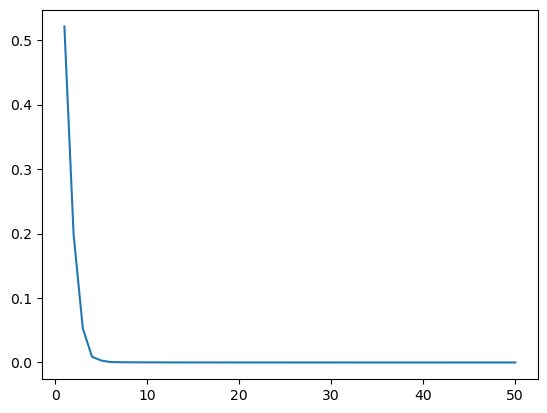

In [69]:
plt.plot(np.arange(1, n_epochs + 1), epoch_loss_values)
plt.show()

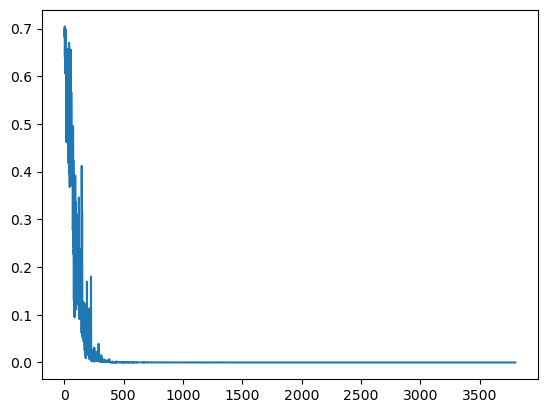

In [70]:
plt.plot(
    np.arange(1, n_iters * n_epochs + 1), 
    [v.cpu().detach().numpy() for v in step_loss_values]
)
plt.show()

In [71]:
true_labels, predictions = make_predictions(model, df_test, batch_size=batch_size, threshold=0.5)

Прогноз: 1
Істина: 1
Відгук: 
This is original equipment battery charger manufactered by Canon. The performance of the charger is excellent as are most Canon products. The price paid was comparible to non-sale priced items puchased via internet sites. The item was recieved in original packaging, 3 days after placing the order, was new (not reconditioned with a new appearance). I am extremely pleased with the entire purchase process experienced, from the information given at the site to ease of ordering and fast shipping


\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=

Прогноз: 1
Істина: 1
Відгук: 
With most of the carrying case made of either fake leather or some kind of neoprene material, this one is really different.  The rigid structure also seem to do a great job to protect the camera.  There is also a belt loop and D-ring feature which is great.



\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=

Прогноз: 1
Істина

Матриця якості класифікації на тестових даних:

In [72]:
print(classification_report(true_labels, predictions))
print(accuracy_score(true_labels, predictions))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.86      0.79      0.82       100

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

0.83


In [73]:
true_labels, predictions = make_predictions(model, df_train, batch_size=batch_size, threshold=0.5)

Прогноз: 1
Істина: 1
Відгук: 
Bought these batteries & charger just before going on an overseas trip.  I didn't want to be bothered with frequently changing AA batteries, which seemed to last only a day or so of heavy use.  I was quite pleased with the performance of these rechargeables.  They lasted several days of heavy use before needing to be charged and they re-charged in only a few hours.  A big bonus that I didn't expect:  the recharger is compatible with European 240 voltage so I didn't have to use an electric converter! 


\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=

Прогноз: 1
Істина: 1
Відгук: 
This is our first LCD TV.  Our tube TV finally died.  My wife actually picked out this unit and Consumer Reports also recommended this unit.  We purchased it directly from AMAZON on January 23, 2007.  I wanted to wait a couple of months before I write my review to see if anything happens. But to my surprise the TV is still running and there have be

Матриця якості класифікації на тренувальних даних:

In [74]:
print(classification_report(true_labels, predictions))
print(accuracy_score(true_labels, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1900
           1       1.00      1.00      1.00      1900

    accuracy                           1.00      3800
   macro avg       1.00      1.00      1.00      3800
weighted avg       1.00      1.00      1.00      3800

1.0


Додавання компоненти з довгою пам'яттю покращило результат на тестовій вибірці. Зокрема можна було б тренувати модель трохи менше -- приблизно такі самі результати досягаються на тренованій мережі після двадцяти епох.

In [75]:
# Розглянемо матрицю вкладень
E = model.embedding
Em = E.weight
Em = Em.cpu().detach().numpy()
Em.shape

(7043, 250)

In [76]:
WORD_TO_IDX.get('good', None)

207

In [77]:
WORD_TO_IDX.get('best', None)

567

In [78]:
WORD_TO_IDX.get('bad', None)

459

In [79]:
WORD_TO_IDX.get('awful', None)

4902

In [80]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', learning_rate='auto')
tsne_dat = tsne.fit_transform(Em)

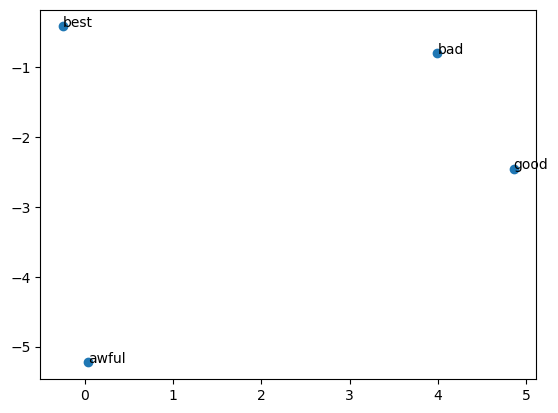

In [81]:
X = tsne_dat[[24, 88, 375, 4155],0]
Y = tsne_dat[[24, 88, 375, 4155],1]

fig, ax = plt.subplots()
ax.scatter(X, Y)

for i, txt in enumerate(['best', 'good', 'bad', 'awful']):
    ax.annotate(txt, (X[i], Y[i]))

In [82]:
bad = tsne_dat[[375],]
good = tsne_dat[[88],]
np.dot(bad, good.T) / (np.linalg.norm(bad) * np.linalg.norm(good))

array([[0.96369445]], dtype=float32)

In [83]:
best = tsne_dat[[24],]
awful = tsne_dat[[4155],]
np.dot(best, awful.T) / (np.linalg.norm(best) * np.linalg.norm(awful))

array([[0.8556826]], dtype=float32)

In [84]:
np.dot(best, good.T) / (np.linalg.norm(best) * np.linalg.norm(good))

array([[-0.06844955]], dtype=float32)

Я думав зробити якісь інтуїтивні припущення щодо інтерпретації матриці вкладення слів у даній моделі, але поки інтуїції тут не бачу. Можливо шляпа у контексті та частоті виникнення слів у реченнях.

Тепер час скористатися існуючим вкладенням слів. Наприклад, візьмемо до уваги word2vec.

In [85]:
from gensim.models import Word2Vec, KeyedVectors
from ast import literal_eval

In [86]:
df_sentences = df_train['filtered'].tolist() + df_test['filtered'].tolist()

n_dim = 500

lang_model = Word2Vec(sentences=df_sentences,
                      vector_size=n_dim,
                      min_count=5,
                      window=5)

In [87]:
lang_model.train(df_sentences, 
                 total_examples=lang_model.corpus_count,
                 epochs=30)

(5427487, 6210450)

In [88]:
W2V_IDX = lang_model.wv.key_to_index.copy()
#W2V_IDX

In [89]:
lang_model.wv.most_similar('good')

[('excellent', 0.5140680074691772),
 ('great', 0.5062516927719116),
 ('decent', 0.4454328417778015),
 ('nice', 0.4177585542201996),
 ('amazed', 0.4162523150444031),
 ('impressive', 0.4120185077190399),
 ('outstanding', 0.4116992950439453),
 ('fantastic', 0.407986581325531),
 ('slick', 0.39789918065071106),
 ('high-quality', 0.3970792591571808)]

In [90]:
lang_model.wv.most_similar('bad')

[('good', 0.39269542694091797),
 ('plain', 0.3631345331668854),
 ('terrible', 0.3619552552700043),
 ('poor', 0.3558204472064972),
 ('phillips', 0.35506078600883484),
 ('amazed', 0.3479156196117401),
 ('surprisingly', 0.3396844267845154),
 ('glitch', 0.32196179032325745),
 ('maybe', 0.31957942247390747),
 ('horrible', 0.3180975019931793)]

In [91]:
lang_model.wv.most_similar('awful')

[('buzzing', 0.6211816072463989),
 ('horrible', 0.601510226726532),
 ('caller', 0.5615156888961792),
 ('resulting', 0.559525728225708),
 ('sounded', 0.5492215156555176),
 ('plain', 0.5483198761940002),
 ('phillips', 0.5340328216552734),
 ('ok.', 0.5246902704238892),
 ('noisy', 0.5226194262504578),
 ('crisp', 0.5161285400390625)]

Ніколи не купляв техніку phillips. Можливо, word2vec мені про щось натякає.

In [92]:
lang_model.wv.most_similar('best')

[('worst', 0.5483927726745605),
 ('largest', 0.40753480792045593),
 ('spectacular', 0.38999995589256287),
 ('better', 0.38420429825782776),
 ('excellent', 0.3716984987258911),
 ('easiest', 0.36569610238075256),
 ('superior', 0.3645923435688019),
 ('among', 0.3588825762271881),
 ('impressed', 0.3556548058986664),
 ('exceeded', 0.35126423835754395)]

Прикольно, нині "хороше" є "поганим" :)

In [93]:
w2v_vectors = lang_model.wv
print(w2v_vectors)

KeyedVectors<vector_size=500, 3906 keys>


По суті, інтуїції стільки ж, скільки було при дослідженні власного вкладення.

In [94]:
E_W2V = np.array([w2v_vectors[w] for w in w2v_vectors.key_to_index.keys()])
E_W2V.shape

(3906, 500)

Пхати продукти моделі word2vec будемо у попередню LSTM-мережу.

In [95]:
class Word2VecLSTM(nn.Module):
    
    def __init__(self, embedding_matrix, hidden_size):
        super(self.__class__, self).__init__()
        self.vocab_size, self.embedding_size = embedding_matrix.shape
        
        # Вставляємо готовий шар вкладення слів на основі word2vec, який надалі не буде тренуватися
        self.embedding = nn.Embedding(self.vocab_size, self.embedding_size)
        self.embedding.weight = torch.nn.Parameter(embedding_matrix)
        self.embedding.weight.requires_grad = False
        
        self.hidden_size = hidden_size
        
        # Інші компоненти LSTM
        self.lstm = nn.LSTM(input_size=self.embedding_size, 
                            hidden_size=self.hidden_size, 
                            num_layers=1, 
                            batch_first=True,
                            bidirectional=True)
        self.linear = nn.Linear(2 * self.hidden_size, 1)      
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, sequences_lengths):
        # Вкладаємо текст (-ову послідовність) 
        embedding = self.embedding(x)

        pack = torch.nn.utils.rnn.pack_padded_sequence(
            embedding, sequences_lengths, 
            batch_first=True, enforce_sorted=False
        )
        # Долучаємо рекурентну компоненту        
        packed_out, _ = self.lstm(pack)
        out, _ = torch.nn.utils.rnn.pad_packed_sequence(
            packed_out, batch_first=True
        )
        out_fwd = out[range(len(out)), sequences_lengths - 1, :self.hidden_size]
        out_rev = out[:, 0, self.hidden_size:]
        out_red = torch.cat((out_fwd, out_rev), 1)
        # Витягуємо з LSTM-компоненти дані у класичний шар мережі
        from_linear = self.linear(out_red)
        # Прогнозуємо тональність текстів
        output = self.sigmoid(from_linear)
        return output

Спробуємо натренувати модель класифікації на основі існуючого вкладення.

In [96]:
# Ініціалізація моделі
model = Word2VecLSTM(
    embedding_matrix=torch.nn.Parameter(torch.from_numpy(E_W2V).float()).to(device), hidden_size=100
)
model.to(device)

Word2VecLSTM(
  (embedding): Embedding(3906, 500)
  (lstm): LSTM(500, 100, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=200, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [97]:
epoch_loss_values = []
step_loss_values = []

In [98]:
# Функція вартості -- "бінарна ентропія" 
loss_function = nn.BCELoss()
# Використаємо ADAM в якості оптимізатора
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [99]:
df_train['filtered_w2v'] = df_train['cleaned'].apply(lambda u: sequence_cleaner(u, W2V_IDX.keys()))
df_test['filtered_w2v'] = df_test['cleaned'].apply(lambda u: sequence_cleaner(u, W2V_IDX.keys()))

/tmp/ipykernel_3747/1214950564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['filtered_w2v'] = df_test['cleaned'].apply(lambda u: sequence_cleaner(u, W2V_IDX.keys()))


Є проблема: деякі речення, на основі словника word2vec, перетворилися на порожні масиви.

In [100]:
df_train['filtered_w2v'][df_train['filtered_w2v'].apply(lambda u: len(u)) == 0]

594    []
903    []
Name: filtered_w2v, dtype: object

Тому є сенс вилучити ці два записи.

In [101]:
df_train = df_train[df_train['filtered_w2v'].apply(lambda u: len(u)) != 0].reset_index(drop=True)
df_train

,text,rating,cleaned,filtered,filtered_w2v
0,"\nThe software is terrible, slow and glitchy. I have to start and close it multiple times to get it to find the player. The operators manual is just under 100 pages, so have fun learning the intricacies of the controls. Granted, the hardware is cute and the variety of functions is impressive--assuming you have sufficient spare time to study the manual.\n",0,"[software, terrible, slow, glitchy, start, close, multiple, time, get, find, player, operator, manual, 100, page, fun, learning, intricacy, control, granted, hardware, cute, variety, function, impressive, --, assuming, sufficient, spare, time, study, manual]","[software, terrible, slow, glitchy, start, close, multiple, time, get, find, player, operator, manual, page, fun, learning, control, granted, hardware, cute, variety, function, impressive, assuming, sufficient, spare, time, study, manual]","[software, terrible, slow, start, close, multiple, time, get, find, player, operator, manual, page, fun, learning, control, granted, hardware, cute, variety, function, impressive, assuming, sufficient, spare, time, study, manual]"
1,"\nI had a 1GB Titanium Sandisk Cruzer at work fail. I tried several times to contact Sandisk, including through the selling vendor with absolutely no response.\n\nMy wife's Cruzer just failed as well (the power light comes on, it is recognized by XP, and the light goes out, the system can't ID the device, so it's useless. It does the same thing on all of the XP systems in our house). I've tried front side USB connections, rear connections and hub connections. No dice. \n\nI'll never buy another Sandisk Cruzer. And I was going to order another 100 for the office. Their loss\n",0,"[1gb, titanium, sandisk, cruzer, work, fail, tried, several, time, contact, sandisk, including, selling, vendor, absolutely, response, wife, 's, cruzer, failed, well, power, light, come, recognized, xp, light, go, system, ca, n't, id, device, 's, useless, doe, thing, xp, system, house, 've, tried, front, side, usb, connection, rear, connection, hub, connection, dice, 'll, never, buy, another, sandisk, cruzer, wa, going, order, another, 100, office, loss]","[titanium, sandisk, cruzer, work, fail, tried, several, time, contact, sandisk, including, selling, vendor, absolutely, response, wife, cruzer, failed, well, power, light, come, recognized, light, system, n't, device, useless, doe, thing, system, house, tried, front, side, usb, connection, rear, connection, hub, connection, dice, never, buy, another, sandisk, cruzer, going, order, another, office, loss]","[sandisk, work, fail, tried, several, time, contact, sandisk, including, selling, vendor, absolutely, response, wife, failed, well, power, light, come, recognized, light, system, n't, device, useless, doe, thing, system, house, tried, front, side, usb, connection, rear, connection, hub, connection, never, buy, another, sandisk, going, order, another, office, loss]"
2,\nI ordered this product June 21st and am now told i should receive it by Oct 28th. I wouldn't waste my time ordering this product from Amazon\n,0,"[ordered, product, june, 21st, told, receive, oct, 28th, would, n't, waste, time, ordering, product, amazon]","[ordered, product, june, told, receive, oct, would, n't, waste, time, ordering, product, amazon]","[ordered, product, june, told, receive, would, n't, waste, time, ordering, product, amazon]"
3,"\nBought these batteries & charger just before going on an overseas trip. I didn't want to be bothered with frequently changing AA batteries, which seemed to last only a day or so of heavy use. I was quite pleased with the performance of these rechargeables. They lasted several days of heavy use before needing to be charged and they re-charged in only a few hours. A big bonus that I didn't expect: the recharger is compatible with European 240 voltage so I didn't have to use an electric converter! \n",1,"[bought, battery, charger, going, overseas, trip, n't, want, bothere

In [102]:
df_test['filtered_w2v'][df_test['filtered_w2v'].apply(lambda u: len(u)) == 0]

Series([], Name: filtered_w2v, dtype: object)

In [103]:
batch_size = 50 # => 3800 / 50 = 76 міні-пакетів
n_epochs = 50
n_train = df_train.shape[0]
n_iters = n_train // batch_size
print("Кількість ітерацій за одну епоху: {}".format(n_iters))

n_tab = str(len(str(n_epochs)))

# Аби не ускладнювати код, припустимо, що n_train ділиться на n_iters * batch_size

residue = n_train - n_iters * batch_size

for epoch in range(n_epochs):
    epoch_loss = 0 
    
    df_train_c = df_train.copy().sample(n_train).reset_index(drop=True)
    
    for step in range(n_iters):

        optimizer.zero_grad()
        # Випадковий пакет
        #current_batch = df_train.sample(batch_size)
        # Детермінований пакет
        idx = np.arange(0, batch_size, 1) + batch_size * step
        current_batch = df_train_c.iloc[idx]

        # Векторизація поточного пакета
        batch_idx, seq_lengths = vectorize(current_batch['filtered_w2v'].tolist(), W2V_IDX)
        seq_lengths = np.array(seq_lengths)
        # Переводимо міні-пакет у тензор
        batch_idx = torch.tensor(batch_idx, dtype=torch.int64).to(device)
        
        # Обираємо справжні рейтинги та переводимо у тензор
        y_true = current_batch['rating'].tolist() 
        y_true = torch.tensor(y_true, dtype=torch.float).to(device)

        # Прогноз
        y_pred = model(batch_idx, seq_lengths)
        
        loss = loss_function(y_pred.squeeze(), y_true)
        
        step_loss_values.append(loss)

        epoch_loss += loss.item() / (n_iters + 1)
        loss.backward()
        optimizer.step()
        
    if residue > 0:
        
        optimizer.zero_grad()
        
        idx = np.arange(batch_size * step, n_train, 1)
        current_batch = df_train_c.iloc[idx]

        # Векторизація поточного пакета
        batch_idx, seq_lengths = vectorize(current_batch['filtered_w2v'].tolist(), W2V_IDX)
        seq_lengths = np.array(seq_lengths)
        # Переводимо міні-пакет у тензор
        batch_idx = torch.tensor(batch_idx, dtype=torch.int64).to(device)
        
        # Обираємо справжні рейтинги та переводимо у тензор
        y_true = current_batch['rating'].tolist() 
        y_true = torch.tensor(y_true, dtype=torch.float).to(device)

        # Прогноз
        y_pred = model(batch_idx, seq_lengths)
        
        loss = loss_function(y_pred.squeeze(), y_true)
        
        step_loss_values.append(loss)

        epoch_loss += loss.item() / (n_iters + 1)
        loss.backward()
        optimizer.step()        
    
    epoch_loss_values.append(epoch_loss)
            
    print(('Епоха {:' + n_tab + '}: сумарні втрати: {}').format(epoch+1, epoch_loss))    

Кількість ітерацій за одну епоху: 75
Епоха  1: сумарні втрати: 0.4859519198929008
Епоха  2: сумарні втрати: 0.32407652488664573
Епоха  3: сумарні втрати: 0.18914841331149404
Епоха  4: сумарні втрати: 0.08672817649417804
Епоха  5: сумарні втрати: 0.026132376000628267
Епоха  6: сумарні втрати: 0.008433064559204997
Епоха  7: сумарні втрати: 0.002279346328577957
Епоха  8: сумарні втрати: 0.0011218837228769095
Епоха  9: сумарні втрати: 0.0007694643082734395
Епоха 10: сумарні втрати: 0.0005768176630035191
Епоха 11: сумарні втрати: 0.0004528921522969061
Епоха 12: сумарні втрати: 0.0003669640837439435
Епоха 13: сумарні втрати: 0.00030365721173247463
Епоха 14: сумарні втрати: 0.00025722738562188556
Епоха 15: сумарні втрати: 0.00021995157035953052
Епоха 16: сумарні втрати: 0.00019082031385072413
Епоха 17: сумарні втрати: 0.00016622935685231107
Епоха 18: сумарні втрати: 0.00014545686080007155
Епоха 19: сумарні втрати: 0.00012869695456174668
Епоха 20: сумарні втрати: 0.00011528315663829407
Епоха 2

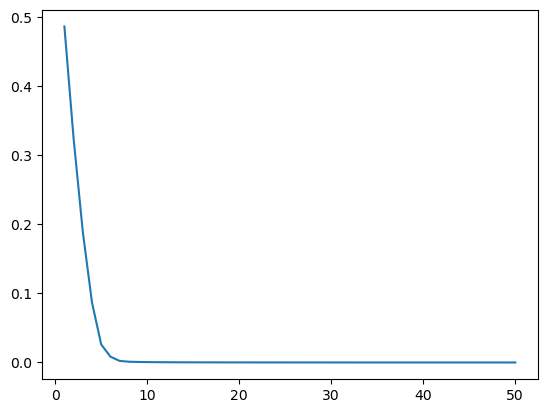

In [104]:
plt.plot(np.arange(1, n_epochs + 1), epoch_loss_values)
plt.show()

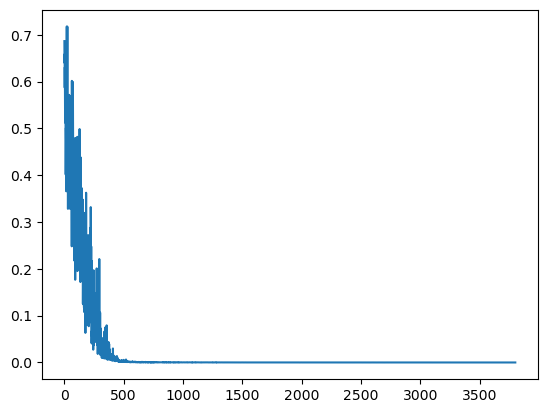

In [107]:
plt.plot(
    np.arange(1, n_epochs * (n_iters + 1) + 1), # TODO: прибрати це позорисько
    [v.cpu().detach().numpy() for v in step_loss_values]
)
plt.show()

In [108]:
def make_predictions_w2v(model, df_test, batch_size, threshold, prints_b = True): 
    global W2V_IDX
    
    n_prints = 0
    predictions = []
    true_labels = []
    # Розбиття даних на міні-пакети
    test_batches = split(df_test, batch_size)
    
    for batch in test_batches:
        # Векторизація міні-пакетів
        batch_ix, seq_lengths = vectorize(batch['filtered'].tolist(), W2V_IDX)
        seq_lengths = np.array(seq_lengths)
        # Перетворення міні-пакетів у тензор 
        batch_ix = torch.tensor(batch_ix, dtype=torch.int64).to(device)

        # Обираємо справжні рейтинги
        y_true = batch['rating'].tolist()

        # Прогнозування
        y_pred = model(batch_ix, seq_lengths).cpu().detach().squeeze().numpy()
        # Переводимо "ймовірності" у прогнози рейтингів
        y_pred = [int(pred.item() > threshold) for pred in y_pred]
        
        # Додаємо до векторів справжніх значень та прогнозів відповідно
        predictions.extend(y_pred)
        true_labels.extend(y_true)
        
        # Щось час від часу виводимо: як вдалий, так і невдалий прогноз 
        if prints_b:
            for true, pred, document in zip(y_true, y_pred, batch['text']):
                if true == 1.0 and n_prints < 10:
                    print("Прогноз: {}".format(pred))
                    print("Істина: {}".format(true))
                    print("Відгук: {}".format(document))
                    print("\n" + "\=\="*20 + "\n")
                    n_prints += 1
        
    return true_labels, predictions

In [109]:
true_labels, predictions = make_predictions_w2v(model, df_test, batch_size=batch_size, threshold=0.5)

Прогноз: 1
Істина: 1
Відгук: 
This is original equipment battery charger manufactered by Canon. The performance of the charger is excellent as are most Canon products. The price paid was comparible to non-sale priced items puchased via internet sites. The item was recieved in original packaging, 3 days after placing the order, was new (not reconditioned with a new appearance). I am extremely pleased with the entire purchase process experienced, from the information given at the site to ease of ordering and fast shipping


\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=

Прогноз: 1
Істина: 1
Відгук: 
With most of the carrying case made of either fake leather or some kind of neoprene material, this one is really different.  The rigid structure also seem to do a great job to protect the camera.  There is also a belt loop and D-ring feature which is great.



\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=\=

Прогноз: 0
Істина

Матриця якості класифікації на тестових даних:

In [110]:
print(classification_report(true_labels, predictions))
print(accuracy_score(true_labels, predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       100
           1       0.86      0.81      0.84       100

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

0.84


Результат майже такий самий, який змогли би отримати за допомогою власного вкладення. Хоча можна побачити на покращення деяких з метрик (наприклад, recall-міра).